# Project

CS295 Blockchain

## Data

## Column Definitions

https://docs.blocknative.com/webhook-api#metadata-payload

- pendingTimeStamp: UTC ISO timestamp when Blocknative first detected the pending state for this transaction
- dispatchTimeStamp: string // the UTC time of time of event dispatch
- blockTimeStamp: Optional. UTC ISO block timestamp the miner reported when collating the block this transaction was eventually mined in. The block timestamp is usually a few seconds before timeStamp, the difference being the time between the miner collating the block, and the block being mined and propagated throughout the network
- pendingBlockNumber: Number // the chain head block number at time of pending detection
- blocksPending: the number of blocks the transaction was pending before being included in a block
- value: Amount of ETH transferred directly to to address from parent (main) transaction from address.
- gas: Maximum amount of gas available to the internal transaction
- gasUsed: Amount of gas actually used executing the internal transaction

## Used Columns
- BlocksPending
- PendingTimeStamp
- ConfirmationTime (DispatchTimeStamp - PendingTimeStamp)
- Gas
- GasPrice
- GasUsed
- MaxFeePerGas
- MaxPriorityFeePerGAs
- BaseFeePerGas

## Environments
- Processor: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz (4 physical cores, 8 threads)
- Memory: 16.0GB
- OS: Ubuntu 20.04 LTS (x64)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
# raw_df = pd.read_csv('confirmed_merged.csv') # entire
raw_df = pd.read_csv('confirmed.csv') # sequential
print("Raw data:", raw_df.shape)
raw_df = raw_df.dropna()
print("After dropping rows with NaN:", raw_df.shape)

from datetime import datetime
def str_to_timestamp(input_str):
    return datetime.strptime(input_str, "%Y-%m-%dT%H:%M:%S.%fZ").timestamp()

columns = [
    "DispatchTimestamp",
    "PendingTimeStamp",
    "BlocksPending",
    "Gas",
    "GasPrice",
    "GasUsed",
    "MaxFeePerGas",
    "MaxPriorityFeePerGas",
    "BaseFeePerGas"
]
df = raw_df[columns]

df["DispatchTimestamp"] = df["DispatchTimestamp"].apply(str_to_timestamp)
df["PendingTimeStamp"] = df["PendingTimeStamp"].apply(str_to_timestamp)
df["ConfirmationTime"] = df["DispatchTimestamp"] - df["PendingTimeStamp"]
df

Raw data: (9743, 22)
After dropping rows with NaN: (7565, 22)


C:\Users\schan\AppData\Local\Temp/ipykernel_20180/1133980877.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DispatchTimestamp"] = df["DispatchTimestamp"].apply(str_to_timestamp)
C:\Users\schan\AppData\Local\Temp/ipykernel_20180/1133980877.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PendingTimeStamp"] = df["PendingTimeStamp"].apply(str_to_timestamp)
C:\Users\schan\AppData\Local\Temp/ipykernel_20180/1133980877.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,DispatchTimestamp,PendingTimeStamp,BlocksPending,Gas,GasPrice,GasUsed,MaxFeePerGas,MaxPriorityFeePerGas,BaseFeePerGas,ConfirmationTime
0,1.645600e+09,1.645600e+09,1.0,261846.0,1.506910e+11,196479.0,1.781400e+11,1.500000e+09,1.491910e+11,14.204
1,1.645600e+09,1.645600e+09,1.0,81986.0,1.506910e+11,81986.0,1.793570e+11,1.500000e+09,1.491910e+11,14.849
2,1.645600e+09,1.645600e+09,1.0,319906.0,1.506910e+11,231540.0,1.781400e+11,1.500000e+09,1.491910e+11,17.961
3,1.645600e+09,1.645600e+09,1.0,283525.0,1.506910e+11,213155.0,1.781400e+11,1.500000e+09,1.491910e+11,21.734
4,1.645600e+09,1.645600e+09,1.0,316361.0,1.511910e+11,228813.0,1.869710e+11,2.000000e+09,1.491910e+11,7.617
...,...,...,...,...,...,...,...,...,...,...
9738,1.645610e+09,1.645610e+09,2.0,283749.0,5.873395e+10,213327.0,8.625942e+10,1.500000e+09,5.723395e+10,11.545
9739,1.645610e+09,1.645610e+09,2.0,253879.0,5.873395e+10,185550.0,9.581158e+10,1.500000e+09,5.723395e+10,10.613
9740,1.645610e+09,1.645610e+09,1.0,321836.0,5.873395e+10,233025.0,9.581158e+10,1.500000e+09,5.723395e+10,5.901
9741,1.645610e+09,1.645610e+09,1.0,260851.0,5.873395e+10,195713.0,9.581158e+10,1.500000e+09,5.723395e+10,6.746


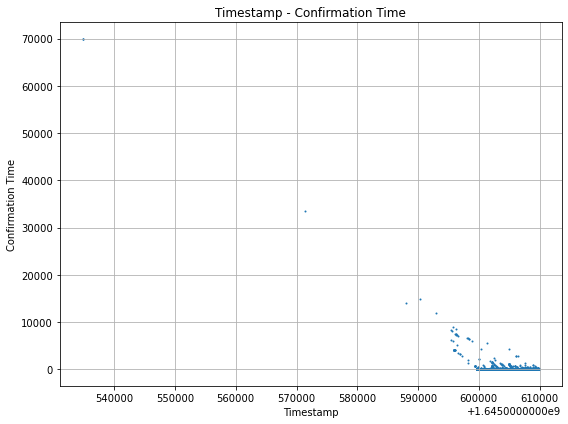

In [3]:
plt.figure(figsize=(8, 6), tight_layout=True)
ax = plt.axes()
ax.set_xlabel('Timestamp')
ax.set_ylabel('Confirmation Time')
plt.title("Timestamp - Confirmation Time")
plt.grid()
plt.scatter(df["PendingTimeStamp"], df["ConfirmationTime"], marker='o', s=1)
plt.show()

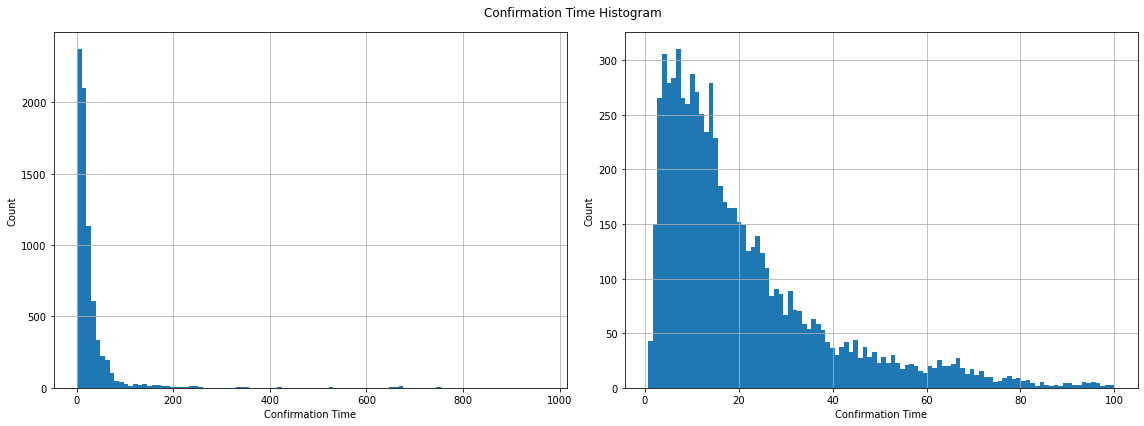

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), tight_layout=True)
fig.suptitle("Confirmation Time Histogram")
axs[0].set_xlabel('Confirmation Time')
axs[0].set_ylabel('Count')
axs[1].set_xlabel('Confirmation Time')
axs[1].set_ylabel('Count')
axs[0].grid()
axs[1].grid()
df = df[df['ConfirmationTime'] < 1000]
axs[0].hist(df["ConfirmationTime"], bins=100)
df = df[df['ConfirmationTime'] < 100]
axs[1].hist(df["ConfirmationTime"], bins=100)
plt.show()

Before removing outliers: (7565, 10)
After removing outliers: (7162, 10)


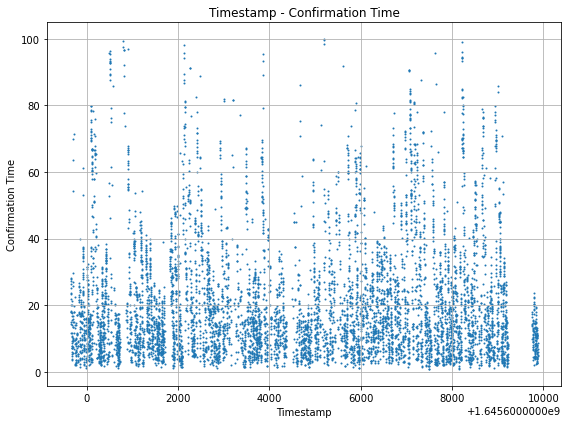

In [4]:
print("Before removing outliers:", df.shape)
df = df[df['ConfirmationTime'] < 100]
print("After removing outliers:", df.shape)

plt.figure(figsize=(8, 6), tight_layout=True)
ax = plt.axes()
ax.set_xlabel('Timestamp')
ax.set_ylabel('Confirmation Time')
plt.title("Timestamp - Confirmation Time")
plt.grid()
plt.scatter(df['PendingTimeStamp'], df['ConfirmationTime'], marker='o', s=1)
plt.show()

                      DispatchTimestamp  PendingTimeStamp  BlocksPending  \
DispatchTimestamp              1.000000          0.999982       0.028201   
PendingTimeStamp               0.999982          1.000000       0.024257   
BlocksPending                  0.028201          0.024257       1.000000   
Gas                            0.018622          0.018823      -0.023584   
GasPrice                      -0.286869         -0.286801      -0.069766   
GasUsed                        0.013077          0.013268      -0.020369   
MaxFeePerGas                  -0.065770         -0.065592      -0.038844   
MaxPriorityFeePerGas          -0.075615         -0.075324      -0.070756   
BaseFeePerGas                 -0.530731         -0.531014      -0.042894   
ConfirmationTime               0.036160          0.030199       0.661782   

                           Gas  GasPrice   GasUsed  MaxFeePerGas  \
DispatchTimestamp     0.018622 -0.286869  0.013077     -0.065770   
PendingTimeStamp      0.018

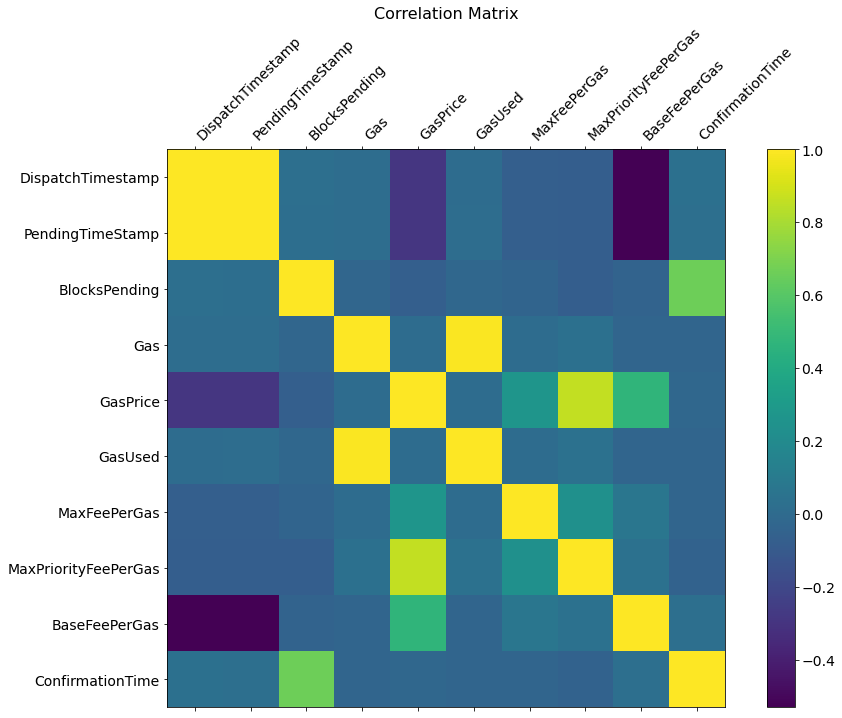

In [5]:
corr_mat = df.corr()
print(corr_mat)
f = plt.figure(figsize=(15, 10))
plt.matshow(corr_mat, fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45, ha='left')
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

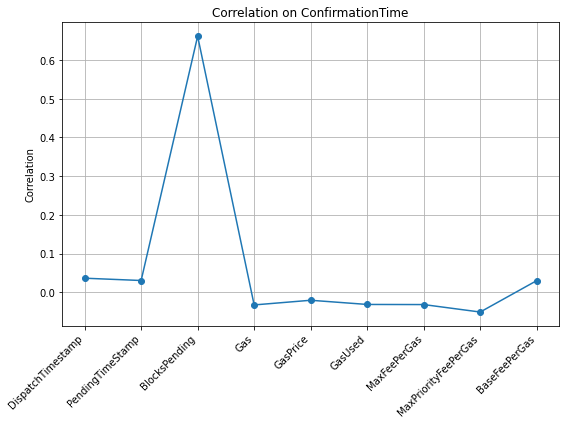

Index(['DispatchTimestamp', 'PendingTimeStamp', 'BlocksPending', 'Gas',
       'GasPrice', 'GasUsed', 'MaxFeePerGas', 'MaxPriorityFeePerGas',
       'BaseFeePerGas'],
      dtype='object')

In [6]:
plt.figure(figsize=(8, 6), tight_layout=True)
ax = plt.axes()
ax.set_ylabel('Correlation')
plt.title("Correlation on ConfirmationTime")
plt.grid()
plt.plot(df.select_dtypes(['number']).columns.drop("ConfirmationTime"), corr_mat["ConfirmationTime"].drop("ConfirmationTime"), marker='o')
plt.xticks(rotation=45, ha='right')
plt.show()
df.select_dtypes(['number']).columns.drop("ConfirmationTime")

In [7]:
from sklearn.preprocessing import StandardScaler

y = df["ConfirmationTime"]
X = df.drop(["DispatchTimestamp", "ConfirmationTime"], axis=1)

print(X.head())
print(y.head())
print(X.shape, y.shape)

y = y.values.reshape(-1, 1)
X_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(y)
X = X_scaler.transform(X)
y = y_scaler.transform(y)
y = y.reshape(-1)
print(X)
print(y)

   PendingTimeStamp  BlocksPending       Gas      GasPrice   GasUsed  \
0      1.645600e+09            1.0  261846.0  1.506910e+11  196479.0   
1      1.645600e+09            1.0   81986.0  1.506910e+11   81986.0   
2      1.645600e+09            1.0  319906.0  1.506910e+11  231540.0   
3      1.645600e+09            1.0  283525.0  1.506910e+11  213155.0   
4      1.645600e+09            1.0  316361.0  1.511910e+11  228813.0   

   MaxFeePerGas  MaxPriorityFeePerGas  BaseFeePerGas  
0  1.781400e+11          1.500000e+09   1.491910e+11  
1  1.793570e+11          1.500000e+09   1.491910e+11  
2  1.781400e+11          1.500000e+09   1.491910e+11  
3  1.781400e+11          1.500000e+09   1.491910e+11  
4  1.869710e+11          2.000000e+09   1.491910e+11  
0    14.204
1    14.849
2    17.961
3    21.734
4     7.617
Name: ConfirmationTime, dtype: float64
(7162, 8) (7162,)
[[-1.69283734 -0.60437506  0.04775137 ...  0.19028548 -0.1607025
   2.61967828]
 [-1.69305664 -0.60437506 -1.48386525 ..

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_test[:10])
print(y_test[:10])

(6445, 8) (6445,)
(717, 8) (717,)
[[-2.38136108e-01  3.99692250e-01  3.94060787e-02 -1.99787061e-01
   4.21484569e-02 -7.78927973e-02 -1.60702500e-01 -2.05601436e-01]
 [-1.18659260e+00 -6.04375058e-01  5.30543568e-01  2.16453270e-02
   5.13436433e-01  2.12038123e-02 -1.60702500e-01  2.86119034e-01]
 [ 1.14373580e+00 -6.04375058e-01  5.27043654e-01 -3.57436929e-01
   5.09152613e-01 -1.53743784e-01 -1.60509216e-01 -5.56161678e-01]
 [ 3.79899398e-01 -6.04375058e-01  5.41886353e-01 -3.28889144e-01
   5.27331735e-01 -7.24091576e-02 -1.59736081e-01 -4.94662047e-01]
 [-1.04302323e+00 -6.04375058e-01  9.39079693e-01 -2.58165180e-01
   1.14722488e+00 -1.14809592e-01 -1.60702500e-01 -3.35239271e-01]
 [ 4.01759818e-01 -6.04375058e-01 -2.61015932e-01 -5.74872040e-01
  -9.25749690e-02 -1.20418049e-01 -1.60509216e-01 -1.03901069e+00]
 [-1.50932659e+00  3.99692250e-01  4.86305002e-01  3.24814242e-01
   5.24335772e-01  2.94583959e-02 -1.60509216e-01  9.58884814e-01]
 [-6.49834377e-01  3.99692250e-01  

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import time

max_depths = [i for i in range(25, 50, 5)]
n_ests = [i for i in range(700, 1300, 100)]

RF_RMSEs = []
RF_train_time = []

for max_depth in max_depths:
    RMSE_per_depth = []
    train_time_per_depth = []
    for n_est in n_ests:
        print(f"Max Depth:\t{max_depth}")
        print(f"# Estimators:\t{n_est}")
        regr = RandomForestRegressor(max_depth=max_depth, n_estimators=n_est, random_state=0)
        start = time.time()
        regr.fit(X_train, y_train)
        end = time.time()
        train_time_per_depth.append(end - start)
        y_hat = regr.predict(X_test)
        y_pred = y_scaler.inverse_transform(y_hat.reshape(-1, 1)).reshape(-1)    
        MSE = mean_squared_error(y_test, y_pred)
        print("MSE:", MSE)
        RMSE = sqrt(MSE)
        print("RMSE:", RMSE)
        RMSE_per_depth.append(RMSE)
    RF_train_time.append(train_time_per_depth)
    RF_RMSEs.append(RMSE_per_depth)

RF_RMSEs = np.array(RF_RMSEs)
print("MSEs:")
print(RF_RMSEs)
RF_train_time = np.array(RF_train_time)
print("Training Time:")
print(RF_train_time)
print(f"Total Training Time: {RF_train_time.sum()}")

Max Depth:	25
# Estimators:	700
MSE: 45.34475558304292
RMSE: 6.733851467254302
Max Depth:	25
# Estimators:	800
MSE: 45.19144823384702
RMSE: 6.722458496253214
Max Depth:	25
# Estimators:	900
MSE: 45.145154146986336
RMSE: 6.719014373179026
Max Depth:	25
# Estimators:	1000
MSE: 45.1356791612443
RMSE: 6.7183092487056815
Max Depth:	25
# Estimators:	1100
MSE: 45.27737900930203
RMSE: 6.728846781529658
Max Depth:	25
# Estimators:	1200
MSE: 45.27951798645362
RMSE: 6.729005720494939
Max Depth:	30
# Estimators:	700
MSE: 44.76724765861077
RMSE: 6.69083310646819
Max Depth:	30
# Estimators:	800
MSE: 44.678138231887935
RMSE: 6.6841707213302035
Max Depth:	30
# Estimators:	900
MSE: 44.590042586053414
RMSE: 6.677577598654576
Max Depth:	30
# Estimators:	1000
MSE: 44.62195391500944
RMSE: 6.67996661032145
Max Depth:	30
# Estimators:	1100
MSE: 44.745199281282154
RMSE: 6.689185247941796
Max Depth:	30
# Estimators:	1200
MSE: 44.761763335386455
RMSE: 6.690423255324468
Max Depth:	35
# Estimators:	700
MSE: 44.87

Minimum RMSE: 6.677577598654576
# estimators: 900
max depth: 30


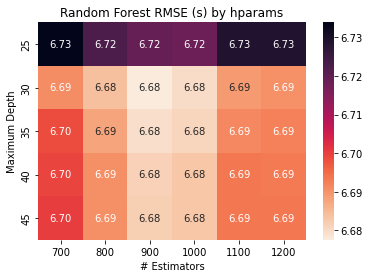

In [35]:
import seaborn as sns

ax = sns.heatmap(RF_RMSEs, xticklabels=n_ests, yticklabels=max_depths, cmap=sns.cm.rocket_r, annot=True, fmt='.2f')
plt.xlabel("# Estimators")
plt.ylabel("Maximum Depth")
plt.title("Random Forest RMSE (s) by hparams")

print(f"Minimum RMSE: {RF_RMSEs.min()}")
col = np.where(RF_RMSEs == np.amin(RF_RMSEs))[0][0]
row = np.where(RF_RMSEs == np.amin(RF_RMSEs))[1][0]
print(f"# estimators: {n_ests[row]}")
print(f"max depth: {max_depths[col]}")

Total Training Time: 706.730544090271


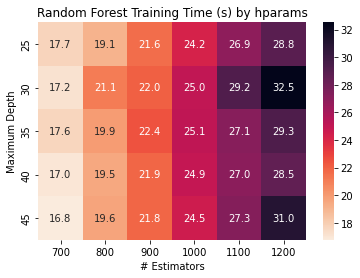

In [34]:
import seaborn as sns

ax = sns.heatmap(RF_train_time, xticklabels=n_ests, yticklabels=max_depths, cmap=sns.cm.rocket_r, annot=True, fmt='.1f')
plt.xlabel("# Estimators")
plt.ylabel("Maximum Depth")
plt.title("Random Forest Training Time (s) by hparams")

print(f"Total Training Time: {RF_train_time.sum()}")

In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import time

num_layers = [i for i in range(3, 10)]
num_hidden_units = [i for i in range(80, 330, 50)]

MLP_RMSEs = []
MLP_train_time = []

for num_layer in num_layers:
    RMSE_per_num_layer = []
    train_time_per_num_layer = []
    for num_hidden in num_hidden_units:
        print(f"# Layers:\t{num_layer}")
        print(f"# Hidden Units:\t{num_hidden}")
        hidden_layers = [num_hidden for i in range(num_layer)]
        regr = MLPRegressor(hidden_layer_sizes=tuple(hidden_layers), max_iter=1000)
        start = time.time()
        regr.fit(X_train, y_train)
        end = time.time()
        train_time_per_num_layer.append(end - start)
        y_hat = regr.predict(X_test)
        y_pred = y_scaler.inverse_transform(y_hat.reshape(-1, 1)).reshape(-1)
        MSE = mean_squared_error(y_test, y_pred)
        print("MSE:", MSE)
        RMSE = sqrt(MSE)
        print("RMSE:", RMSE)
        RMSE_per_num_layer.append(RMSE)
    MLP_train_time.append(train_time_per_num_layer)
    MLP_RMSEs.append(RMSE_per_num_layer)

MLP_RMSEs = np.array(MLP_RMSEs)
print("MSEs:")
print(MLP_RMSEs)
MLP_train_time = np.array(MLP_train_time)
print("Training Time:")
print(MLP_train_time)
print(f"Total Training Time: {MLP_train_time.sum()}")

# Layers:	3
# Hidden Units:	80
MSE: 120.28467866557266
RMSE: 10.967437196791813
# Layers:	3
# Hidden Units:	130
MSE: 119.23500072602516
RMSE: 10.919478042746602
# Layers:	3
# Hidden Units:	180
MSE: 107.42573049658697
RMSE: 10.364638464345342
# Layers:	3
# Hidden Units:	230
MSE: 121.10530486303405
RMSE: 11.004785543709339
# Layers:	3
# Hidden Units:	280
MSE: 114.57144435288846
RMSE: 10.703805134291658
# Layers:	4
# Hidden Units:	80
MSE: 115.16729102438498
RMSE: 10.731602444387557
# Layers:	4
# Hidden Units:	130
MSE: 116.5172705325393
RMSE: 10.794316584783832
# Layers:	4
# Hidden Units:	180
MSE: 121.52011331613242
RMSE: 11.023616163316483
# Layers:	4
# Hidden Units:	230
MSE: 112.04883716540469
RMSE: 10.585312331972293
# Layers:	4
# Hidden Units:	280
MSE: 107.54822673433952
RMSE: 10.370546115530248
# Layers:	5
# Hidden Units:	80
MSE: 124.59184865222029
RMSE: 11.162071879907435
# Layers:	5
# Hidden Units:	130
MSE: 114.9992083166267
RMSE: 10.72376838227247
# Layers:	5
# Hidden Units:	180
MS

[[10.9674372  10.91947804 10.36463846 11.00478554 10.70380513]
 [10.73160244 10.79431658 11.02361616 10.58531233 10.37054612]
 [11.16207188 10.72376838 10.69467011 10.46155893 10.58904721]
 [10.58666719 10.83069967 10.65793209 10.14552502 10.81157224]
 [11.22505979 10.78714581 10.44346991 11.34104102 10.26821753]
 [11.18429709 10.73931664 10.79909437 10.38811487 11.02414462]
 [11.33447291 10.7109701  10.82193579 10.26151649 10.71686497]]
Minimum RMSE: 10.145525019216144
# estimators: 230
max depth: 6


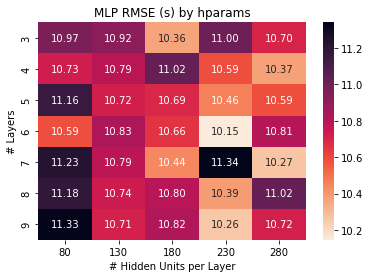

In [33]:
import seaborn as sns

ax = sns.heatmap(MLP_RMSEs, xticklabels=num_hidden_units, yticklabels=num_layers, cmap=sns.cm.rocket_r, annot=True, fmt='.2f')
plt.xlabel("# Hidden Units per Layer")
plt.ylabel("# Layers")
plt.title("MLP RMSE (s) by hparams")

print(MLP_RMSEs)
print(f"Minimum RMSE: {MLP_RMSEs.min()}")
col = np.where(MLP_RMSEs == np.amin(MLP_RMSEs))[0][0]
row = np.where(MLP_RMSEs == np.amin(MLP_RMSEs))[1][0]
print(f"# estimators: {num_hidden_units[row]}")
print(f"max depth: {num_layers[col]}")

Total Training Time: 1830.9841949939728


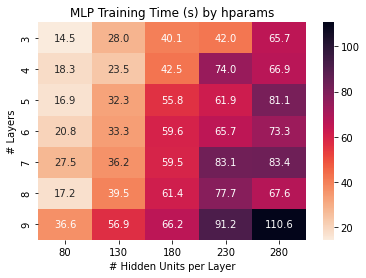

In [32]:
import seaborn as sns

ax = sns.heatmap(MLP_train_time, xticklabels=num_hidden_units, yticklabels=num_layers, cmap=sns.cm.rocket_r, annot=True, fmt='.1f')
plt.xlabel("# Hidden Units per Layer")
plt.ylabel("# Layers")
plt.title("MLP Training Time (s) by hparams")

print(f"Total Training Time: {MLP_train_time.sum()}")